## Importation des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

In [ ]:
root_drive="/content/drive/MyDrive/"
os.listdir(root_drive)

['Colab Notebooks', 'M2 Paris Saclay Projects']

In [ ]:
os.listdir(root_drive+"M2 Paris Saclay Projects")

['Financial econometrics', 'MAL project']

In [ ]:
os.listdir(root_drive+"M2 Paris Saclay Projects/"+'MAL project/')

['data_Targets.csv',
 'data_Features.csv',
 'TP2-2024-MALClassifpart2-NPTree.pdf',
 'MAL project.ipynb']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Données de sorties(variables cibles)

In [ ]:
df_target=pd.read_csv(root_drive+"M2 Paris Saclay Projects/"+'MAL project/'+"data_Targets.csv")
df_target.head()


,Unnamed: 0,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0


### Données d'entrées (variables explicatives)

In [ ]:
df_features=pd.read_csv(root_drive+"M2 Paris Saclay Projects/"+'MAL project/'+"data_Features.csv")
df_features.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0


In [ ]:
df_target['Y1'].unique()

array([  0,   1,   6,   9,   3,  10,   4,  60,  17,  21,  16,  34,   8,
         2,  19,  12,  15,  28,  11,  35,  51,  36,  23,  30,  56,   7,
        48,  43,   5,  14,  13,  63,  54,  65,  20,  98,  33,  52,  79,
        39,  32,  49, 103, 123, 186, 132, 168, 119, 109, 227, 113, 126,
        94,  42,  45,  27,  53,  18,  38,  26,  81,  47,  73,  84, 135,
        37, 112,  62, 256, 433, 245,  24,  61,  29,  92,  87,  55,  25,
        72,  44,  95,  50,  57,  85, 139, 114,  96,  71, 100])

In [ ]:
df_features.shape,df_target.shape

((2556, 11), (2556, 5))

In [ ]:
df_target=df_target[['Y1']]
df_target.head()

,Y1
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_target.Y1.count()

2556

In [ ]:
df_features['time']=pd.to_datetime(df_features.time)

### Dataset de travail

In [ ]:
df=pd.concat([df_features,df_target],axis=1)
df

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,3
2552,2019-12-28,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0
2553,2019-12-29,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0
2554,2019-12-30,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0


## Traitement et Exploration des données

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2556 non-null   datetime64[ns]
 1   t2m     2556 non-null   float64       
 2   u10     2556 non-null   float64       
 3   v10     2556 non-null   float64       
 4   SST     2556 non-null   float64       
 5   SIC     2556 non-null   float64       
 6   r1_MAR  2556 non-null   float64       
 7   r2_MAR  2556 non-null   float64       
 8   r3_MAR  2556 non-null   float64       
 9   r4_MAR  2556 non-null   float64       
 10  r5_MAR  2556 non-null   float64       
 11  Y1      2556 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 239.8 KB


In [ ]:
df.isna().sum()

,0
time,0
t2m,0
u10,0
v10,0
SST,0
SIC,0
r1_MAR,0
r2_MAR,0
r3_MAR,0
r4_MAR,0


### Analyse statistique

In [ ]:
df.describe()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
count,2556,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,2016-07-01 12:00:00,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286,3.525430
min,2013-01-01 00:00:00,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-10-01 18:00:00,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000,0.000000
50%,2016-07-01 12:00:00,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000,0.000000
75%,2018-04-01 06:00:00,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150,0.000000
max,2019-12-31 00:00:00,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318,433.000000
std,NaN,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972,18.977537


### Moyenne mensuelle

In [ ]:
df_monthly_mean = df.resample('M', on='time').mean()
df_monthly_mean

<ipython-input-31-386de5c3b55e>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_mean = df.resample('M', on='time').mean()


,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1
time,,,,,,,,,,,
2013-01-31,-24.616646,-4.523730,3.208358,-1.689965,88.742378,0.509461,0.492305,0.000000,0.000000,9.741214e-09,0.032258
2013-02-28,-28.272998,-2.264989,3.575946,-1.689907,89.165148,0.034567,0.033358,0.000000,0.000000,1.439517e-07,0.000000
2013-03-31,-23.914555,-1.690698,0.253578,-1.689965,91.818156,0.034536,0.033338,0.000000,0.000000,0.000000e+00,0.032258
2013-04-30,-13.044490,-0.193341,2.152484,-1.689860,88.691914,0.073546,0.072544,0.000000,0.000000,0.000000e+00,0.000000
2013-05-31,-3.588948,1.076410,0.573242,-1.520049,85.706767,0.500671,0.252004,0.000000,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,4.284083,-2.629501,1.723587,3.897603,58.709677,97.307656,54.245667,7.129957,26.341142,2.074553e+01,33.903226
2019-09-30,1.561307,-3.195925,0.610594,1.792203,37.333333,10.748575,8.883471,0.412812,1.559236,8.500035e-01,0.000000
2019-10-31,-4.612687,1.010773,-0.795843,-0.605751,63.225806,2.966656,2.655257,0.083781,0.298780,4.598317e-02,0.000000


#### moyenne mensuelle de Y1 pour chaque mois de chaque année

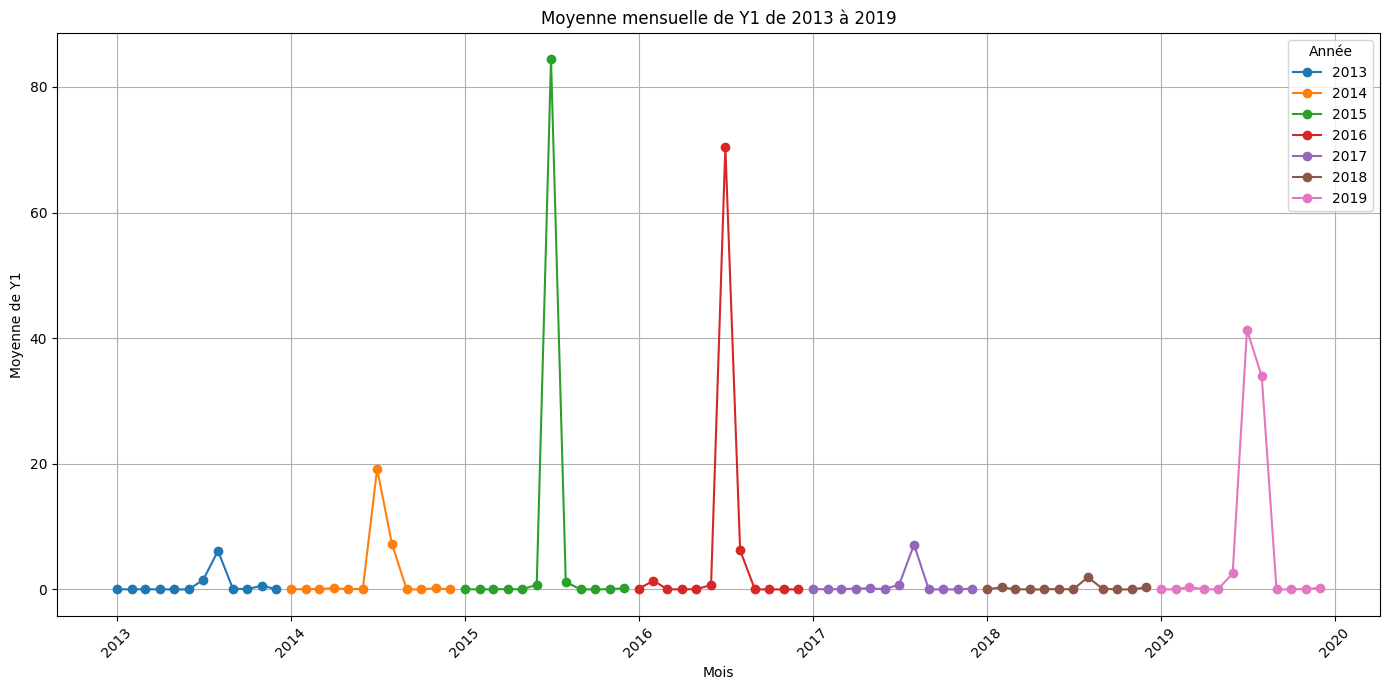

In [ ]:
df_monthly_mean = df.groupby(df['time'].dt.to_period('M'))['Y1'].mean()

df_monthly_mean = df_monthly_mean.reset_index()
df_monthly_mean['time'] = df_monthly_mean['time'].dt.to_timestamp()

plt.figure(figsize=(14, 7))


for year in range(2013, 2020):
    yearly_data = df_monthly_mean[df_monthly_mean['time'].dt.year == year]
    plt.plot(yearly_data['time'], yearly_data['Y1'], marker='o', label=f'{year}')


plt.xlabel("Mois")
plt.ylabel("Moyenne de Y1")
plt.title("Moyenne mensuelle de Y1 de 2013 à 2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

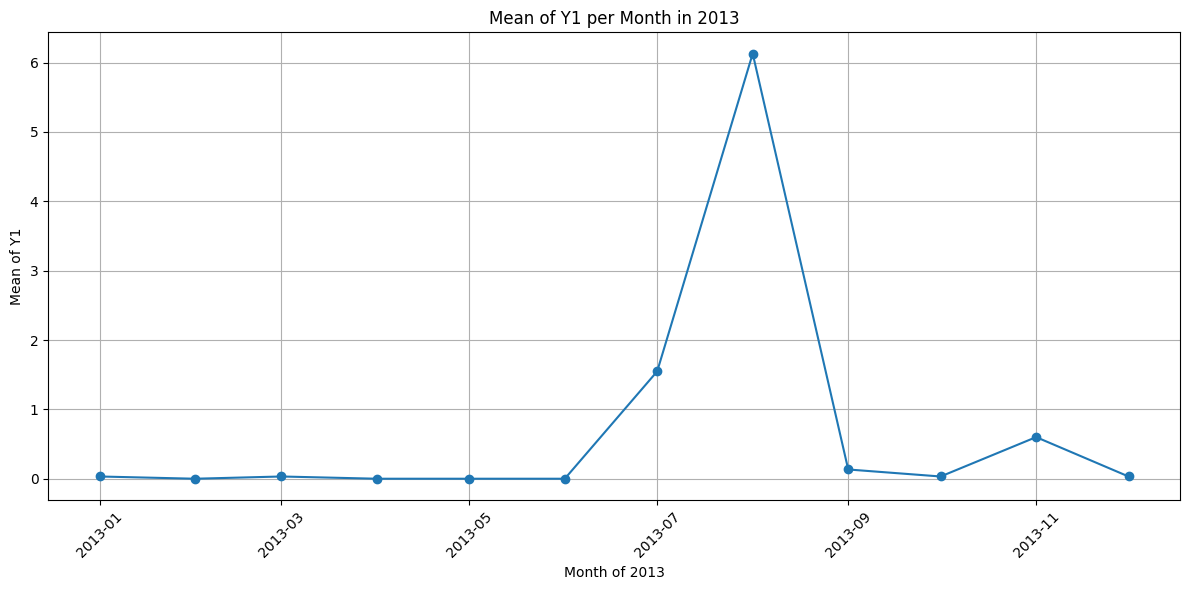

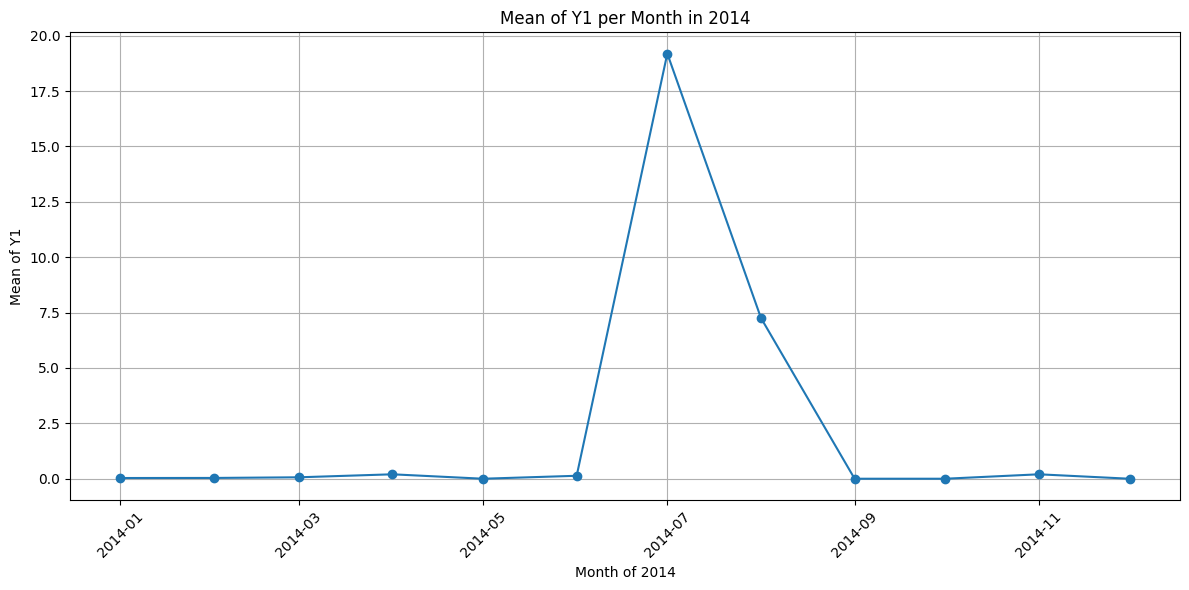

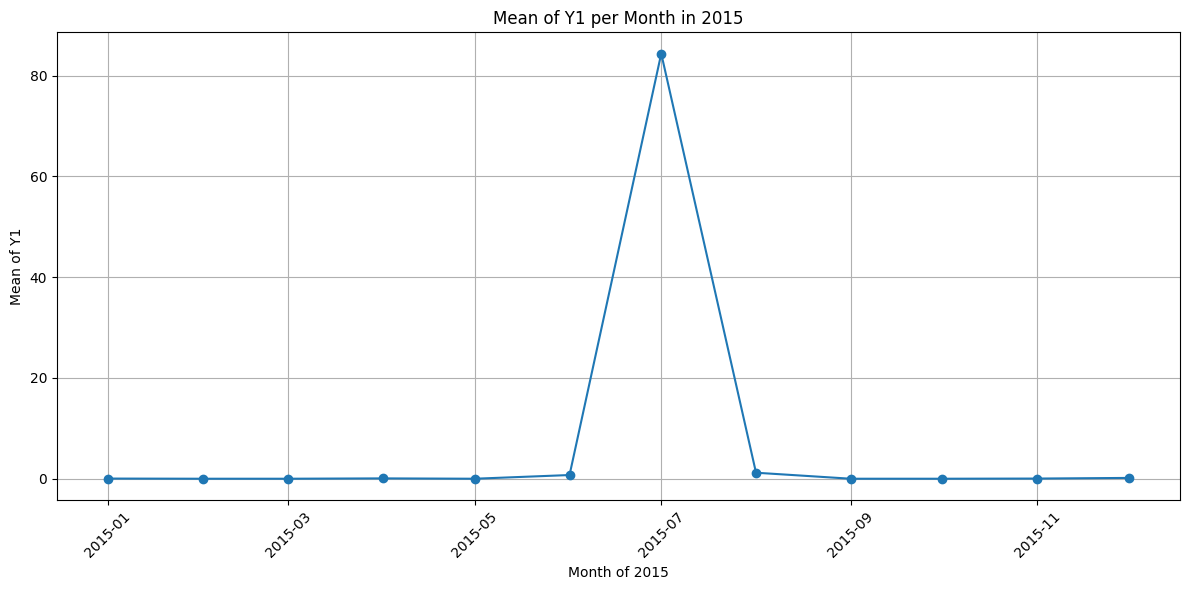

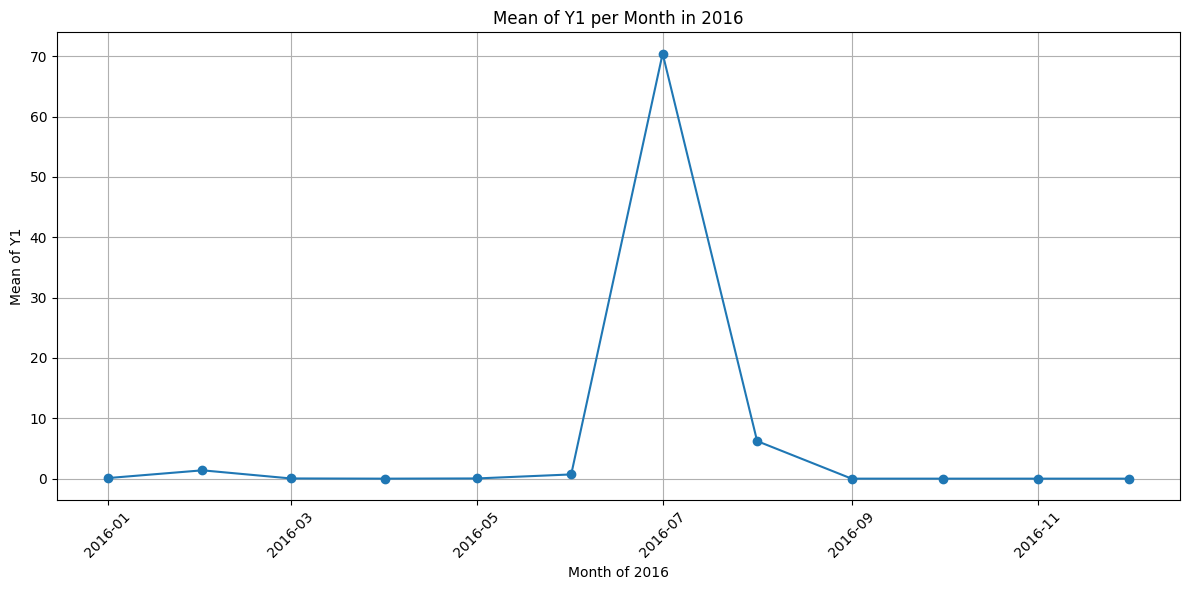

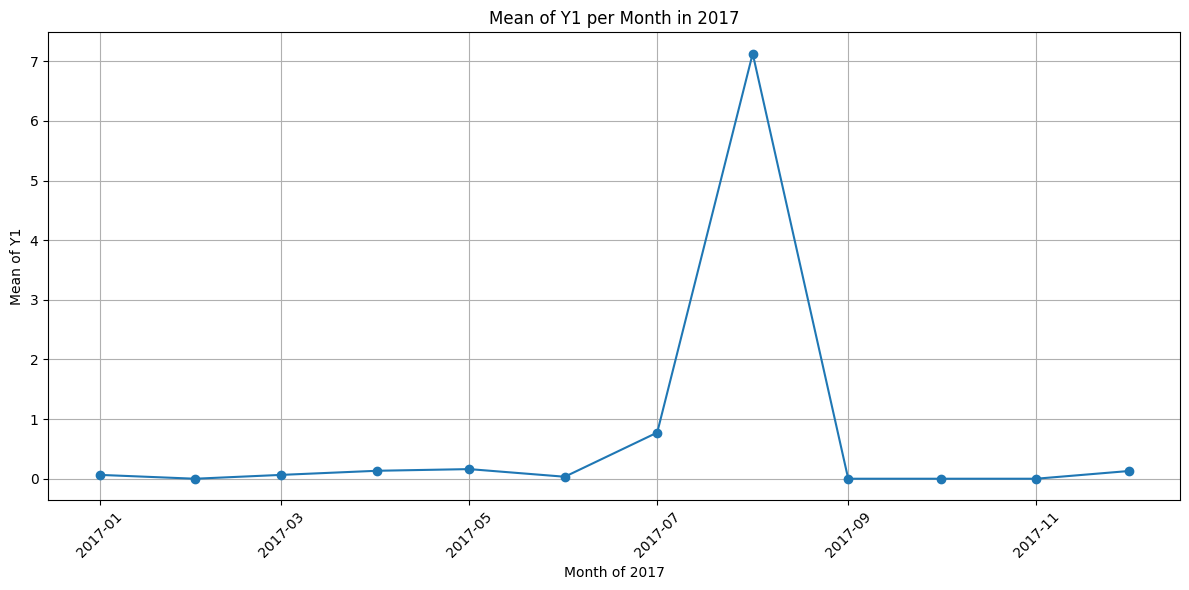

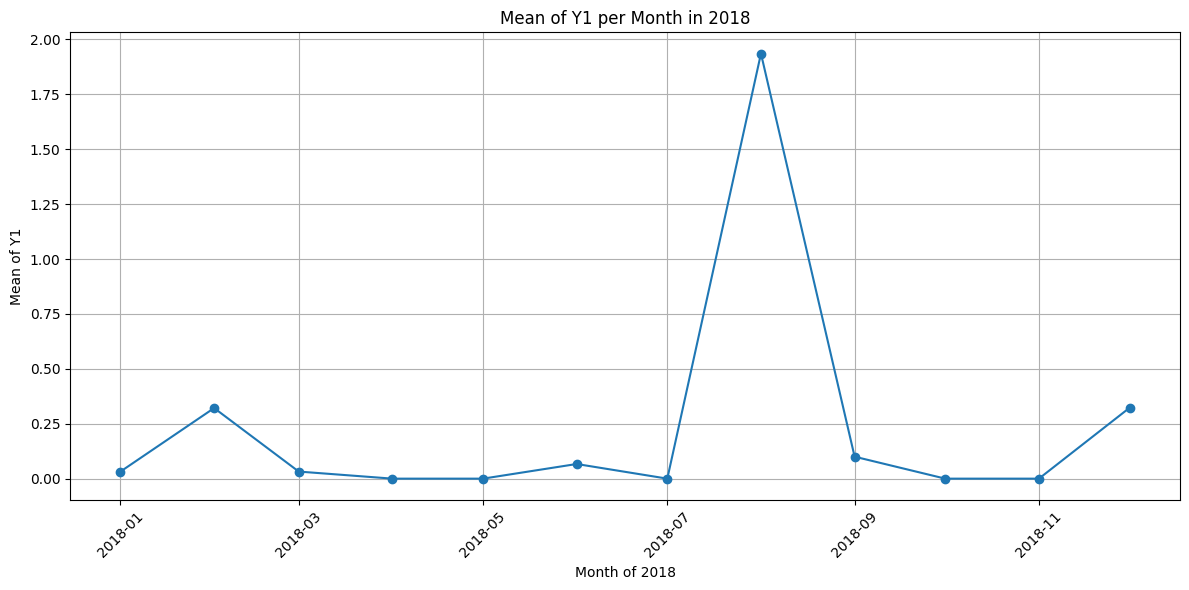

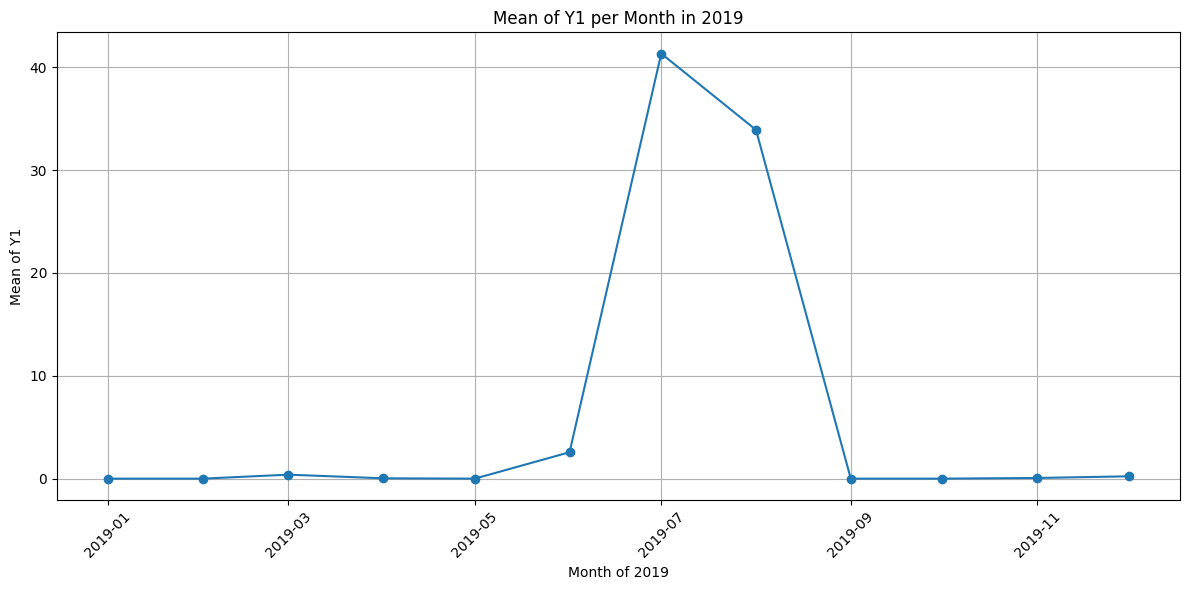

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


years = range(2013, 2020)

for year in years:

    df_year = df[df['time'].dt.year == year]


    df_monthly_mean = df_year.groupby(df_year['time'].dt.to_period('M'))['Y1'].mean()


    plt.figure(figsize=(12, 6))
    plt.plot(df_monthly_mean.index.to_timestamp(), df_monthly_mean.values, marker='o')
    plt.xlabel("Month of " + str(year))
    plt.ylabel("Mean of Y1")
    plt.title("Mean of Y1 per Month in " + str(year))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Température

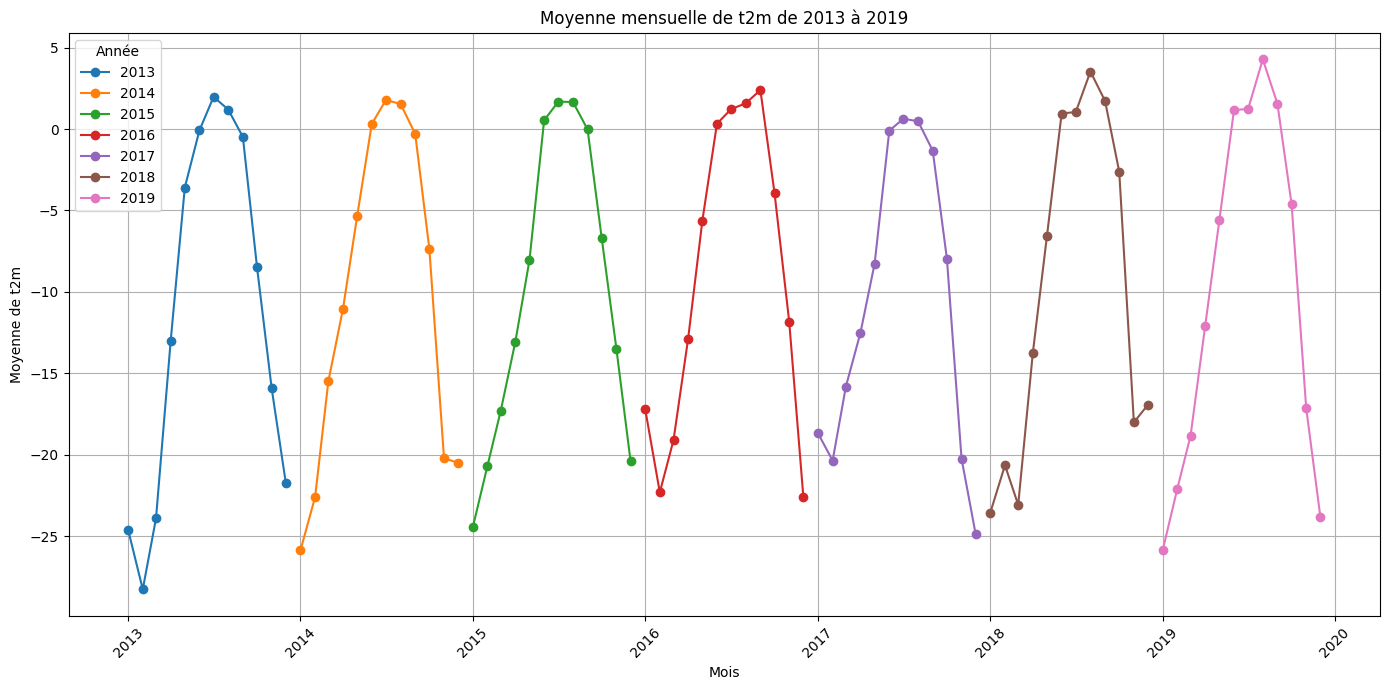

In [ ]:
df_monthly_mean = df.groupby(df['time'].dt.to_period('M'))['t2m'].mean()

df_monthly_mean = df_monthly_mean.reset_index()
df_monthly_mean['time'] = df_monthly_mean['time'].dt.to_timestamp()

plt.figure(figsize=(14, 7))

for year in range(2013, 2020):
    yearly_data = df_monthly_mean[df_monthly_mean['time'].dt.year == year]
    plt.plot(yearly_data['time'], yearly_data['t2m'], marker='o', label=f'{year}')

plt.xlabel("Mois")
plt.ylabel("Moyenne de t2m")
plt.title("Moyenne mensuelle de t2m de 2013 à 2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

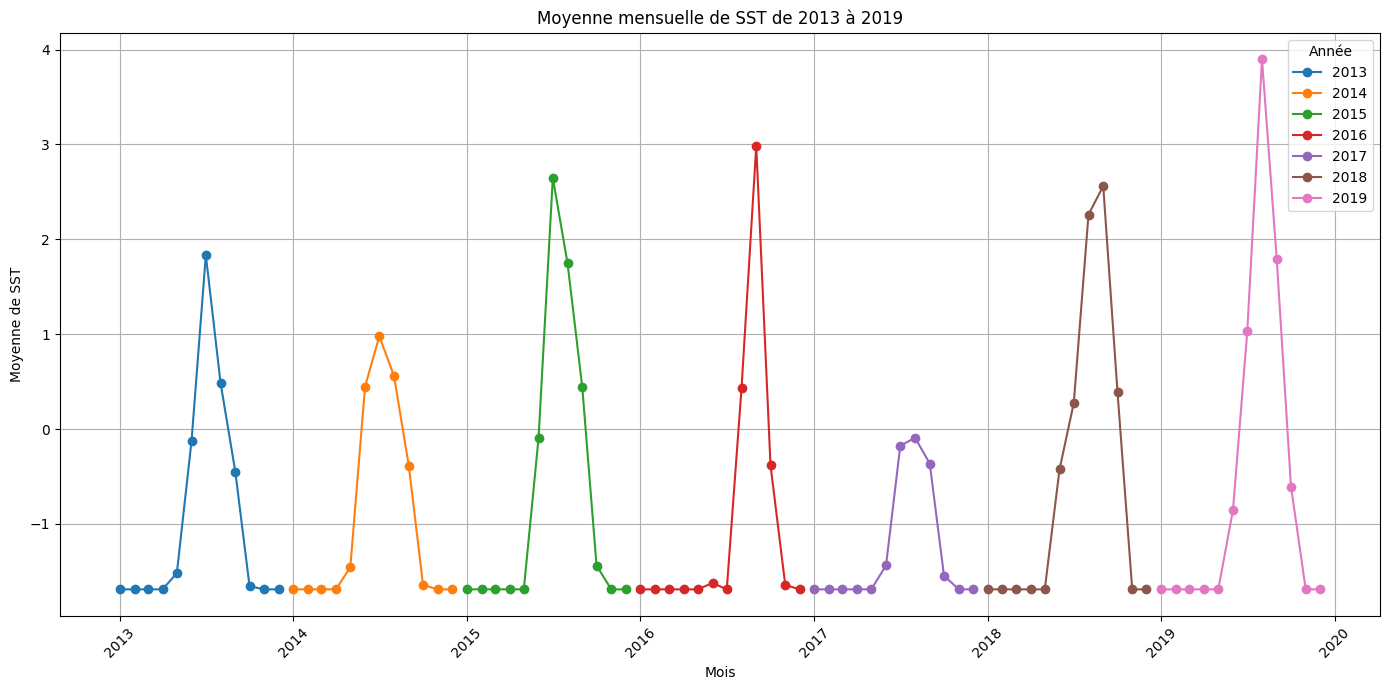

In [ ]:
df_monthly_mean = df.groupby(df['time'].dt.to_period('M'))['SST'].mean()

df_monthly_mean = df_monthly_mean.reset_index()
df_monthly_mean['time'] = df_monthly_mean['time'].dt.to_timestamp()

plt.figure(figsize=(14, 7))

for year in range(2013, 2020):
    yearly_data = df_monthly_mean[df_monthly_mean['time'].dt.year == year]
    plt.plot(yearly_data['time'], yearly_data['SST'], marker='o', label=f'{year}')

plt.xlabel("Mois")
plt.ylabel("Moyenne de SST")
plt.title("Moyenne mensuelle de SST de 2013 à 2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

#### Vitesse du vent

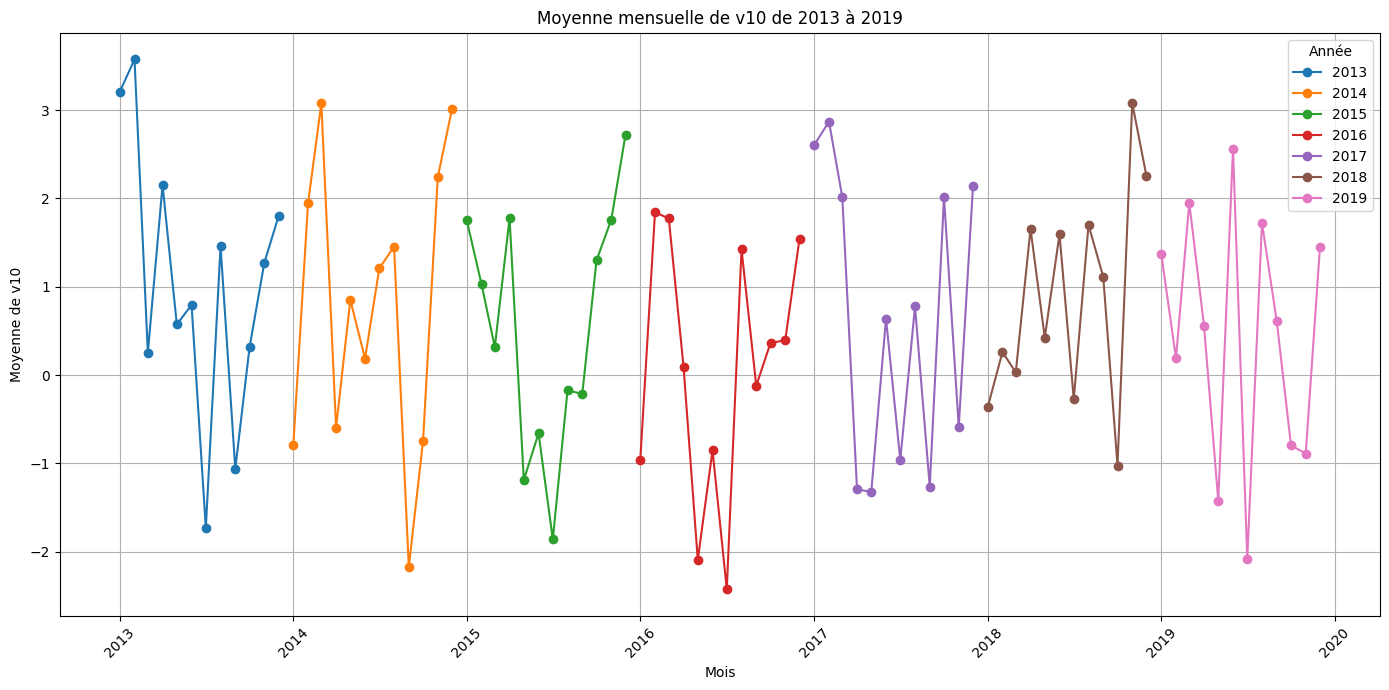

In [ ]:
df_monthly_mean = df.groupby(df['time'].dt.to_period('M'))['v10'].mean()

df_monthly_mean = df_monthly_mean.reset_index()
df_monthly_mean['time'] = df_monthly_mean['time'].dt.to_timestamp()

plt.figure(figsize=(14, 7))

for year in range(2013, 2020):
    yearly_data = df_monthly_mean[df_monthly_mean['time'].dt.year == year]
    plt.plot(yearly_data['time'], yearly_data['v10'], marker='o', label=f'{year}')

plt.xlabel("Mois")
plt.ylabel("Moyenne de v10")
plt.title("Moyenne mensuelle de v10 de 2013 à 2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

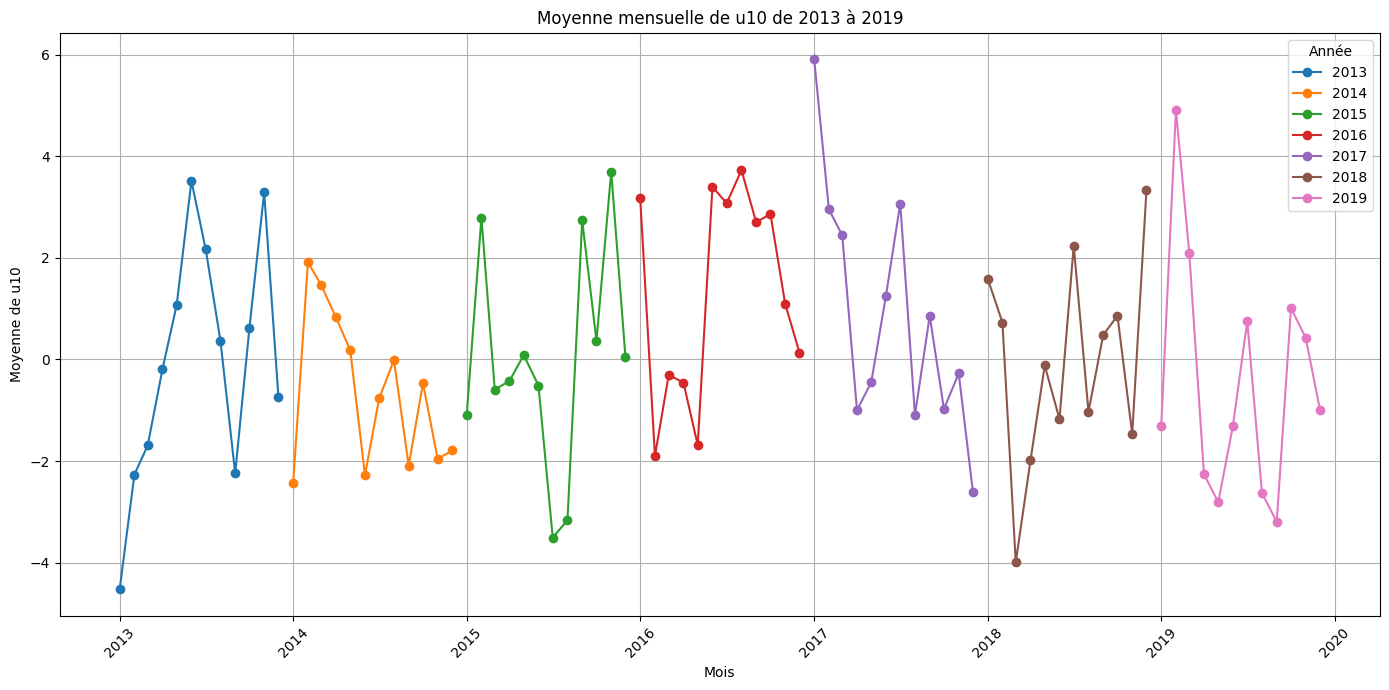

In [ ]:

df_monthly_mean = df.groupby(df['time'].dt.to_period('M'))['u10'].mean()


df_monthly_mean = df_monthly_mean.reset_index()
df_monthly_mean['time'] = df_monthly_mean['time'].dt.to_timestamp()

plt.figure(figsize=(14, 7))


for year in range(2013, 2020):
    yearly_data = df_monthly_mean[df_monthly_mean['time'].dt.year == year]
    plt.plot(yearly_data['time'], yearly_data['u10'], marker='o', label=f'{year}')


plt.xlabel("Mois")
plt.ylabel("Moyenne de u10")
plt.title("Moyenne mensuelle de u10 de 2013 à 2019")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Année")
plt.tight_layout()
plt.show()

### Matrice de corrélation

In [ ]:
import seaborn as sns

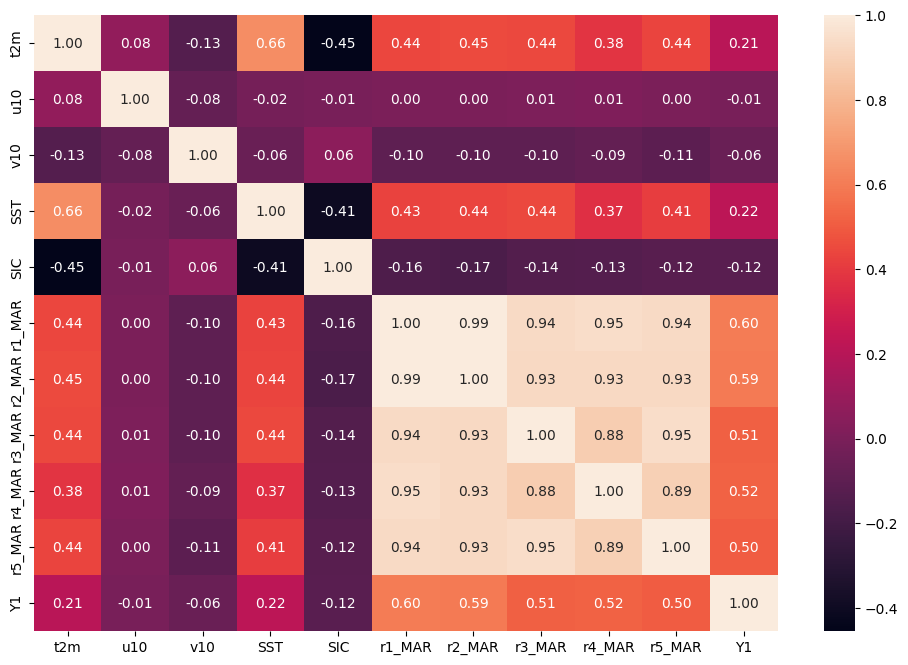

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,fmt=".2f")
plt.show()

### Boxplot

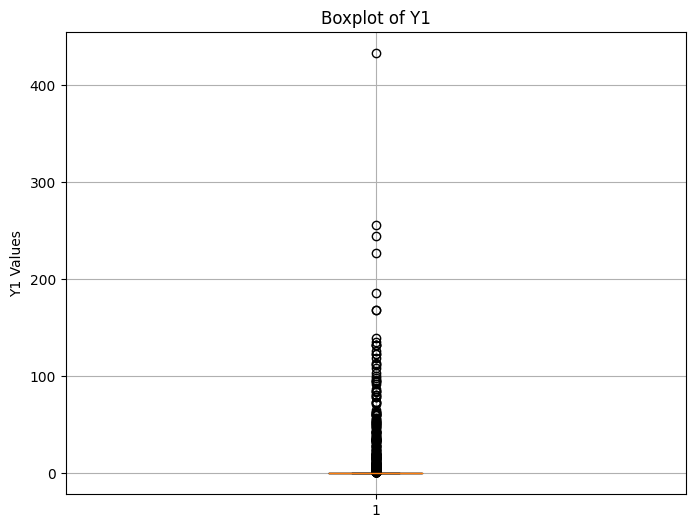

In [ ]:

plt.figure(figsize=(8, 6))
plt.boxplot(df['Y1'])
plt.ylabel("Y1 Values")
plt.title("Boxplot of Y1")
plt.grid(True)
plt.show()

### Distribution

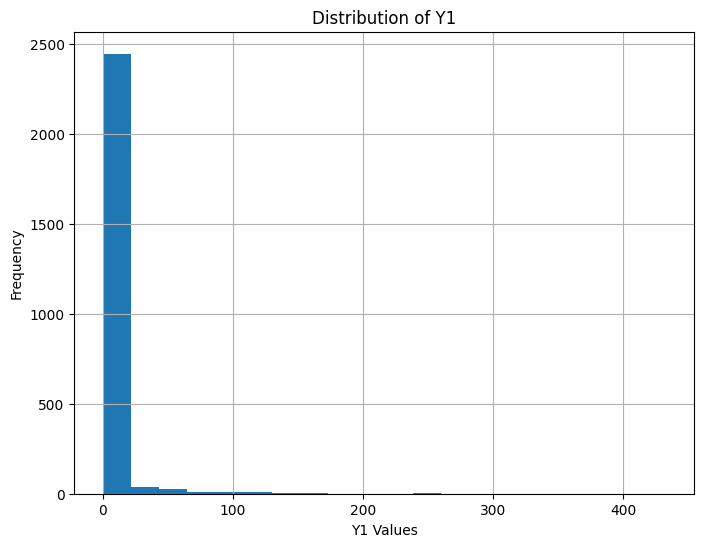

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Y1'], bins=20)
plt.xlabel("Y1 Values")
plt.ylabel("Frequency")
plt.title("Distribution of Y1")
plt.grid(True)
plt.show()

## Choix de seuil de discritisation par K-means

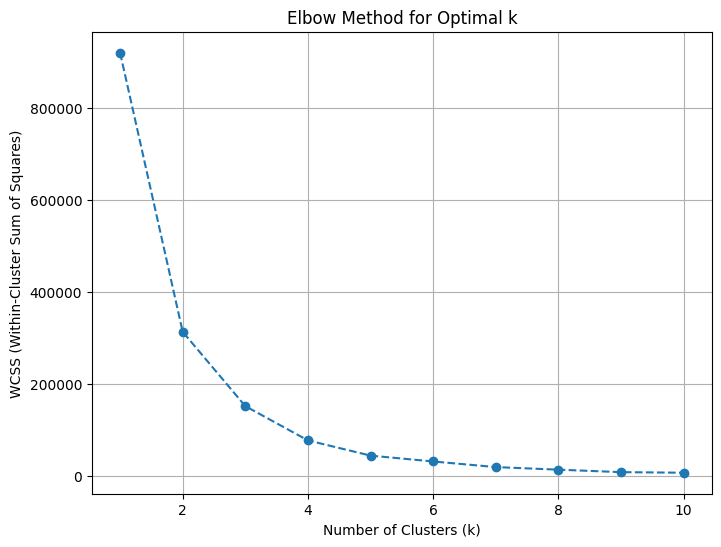

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X=df_target[["Y1"]]

wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Y1']])

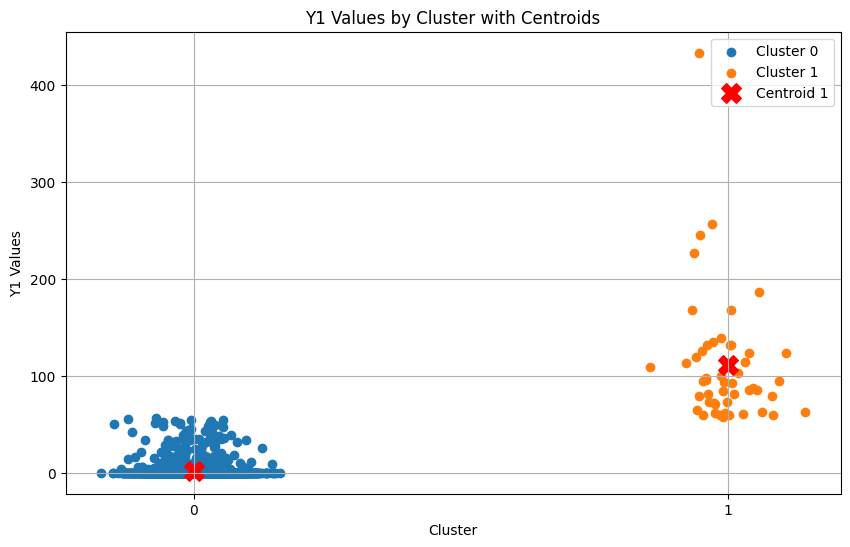

In [ ]:
plt.figure(figsize=(10, 6))


for cluster in df['cluster'].unique():
    plt.scatter(np.random.normal(cluster, 0.05, size=len(df[df['cluster'] == cluster])),
                df[df['cluster'] == cluster]['Y1'],
                label=f'Cluster {cluster}')


centroids = kmeans.cluster_centers_


for i, centroid in enumerate(centroids):
    plt.scatter(i, centroid, marker='X', s=200, color='red', label=f'Centroid {i+1}' if i == 0 else "")


plt.xlabel("Cluster")
plt.ylabel("Y1 Values")
plt.title("Y1 Values by Cluster with Centroids")
plt.xticks(df['cluster'].unique())
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df[df['cluster']==1].describe()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,cluster
count,51,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,2017-02-14 03:17:38.823529472,1.665582,0.163746,-1.370423,0.984700,53.633813,184.638169,107.664068,11.216720,43.776225,43.140966,111.529412,1.0
min,2013-08-07 00:00:00,-0.334528,-8.672046,-10.523009,-1.690511,0.000000,50.001490,25.680527,4.146989,14.473588,17.926666,57.000000,1.0
25%,2015-07-16 12:00:00,0.947264,-4.344321,-4.360648,-1.684983,35.000000,147.680492,78.934900,8.266908,29.832086,32.247094,72.500000,1.0
50%,2016-07-17 00:00:00,1.311585,-0.045474,-1.196422,1.588941,70.000000,177.838361,102.502264,10.836808,42.237668,45.882264,95.000000,1.0
75%,2019-07-17 12:00:00,2.164403,3.556428,1.567828,2.490254,70.000000,232.554702,140.297779,13.613333,50.287163,53.384685,124.500000,1.0
max,2019-08-13 00:00:00,5.490495,10.624731,7.660701,4.487969,88.653333,308.651903,203.931831,20.070001,85.169459,63.777793,433.000000,1.0
std,NaN,1.211375,5.072029,3.676120,1.920119,31.922000,52.779398,35.777964,3.733212,17.501547,12.724902,65.285329,0.0


In [ ]:
df[df['cluster']==0].describe()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,cluster
count,2505,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2.505000e+03,2505.000000,2505.0
mean,2016-06-26 20:46:16.526946048,-10.431412,0.139157,0.667003,-0.896457,73.667542,15.412711,9.564986,1.127427,3.580214,4.418657e+00,1.326547,0.0
min,2013-01-01 00:00:00,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
25%,2014-09-22 00:00:00,-19.993467,-3.590732,-2.020104,-1.689860,70.000000,0.101479,0.101479,0.000000,0.000000,0.000000e+00,0.000000,0.0
50%,2016-06-25 00:00:00,-10.057267,-0.215406,0.949219,-1.689860,84.799270,0.481845,0.481845,0.000000,0.000000,0.000000e+00,0.000000,0.0
75%,2018-03-28 00:00:00,0.061606,3.810772,3.538902,-0.386013,90.500644,3.793925,3.593605,0.000002,0.000050,8.692760e-08,0.000000,0.0
max,2019-12-31 00:00:00,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,8.805432e+01,56.000000,0.0
std,NaN,10.303162,5.013467,3.951111,1.410579,29.063245,41.167087,24.062639,3.072435,11.546411,1.225743e+01,6.320983,0.0


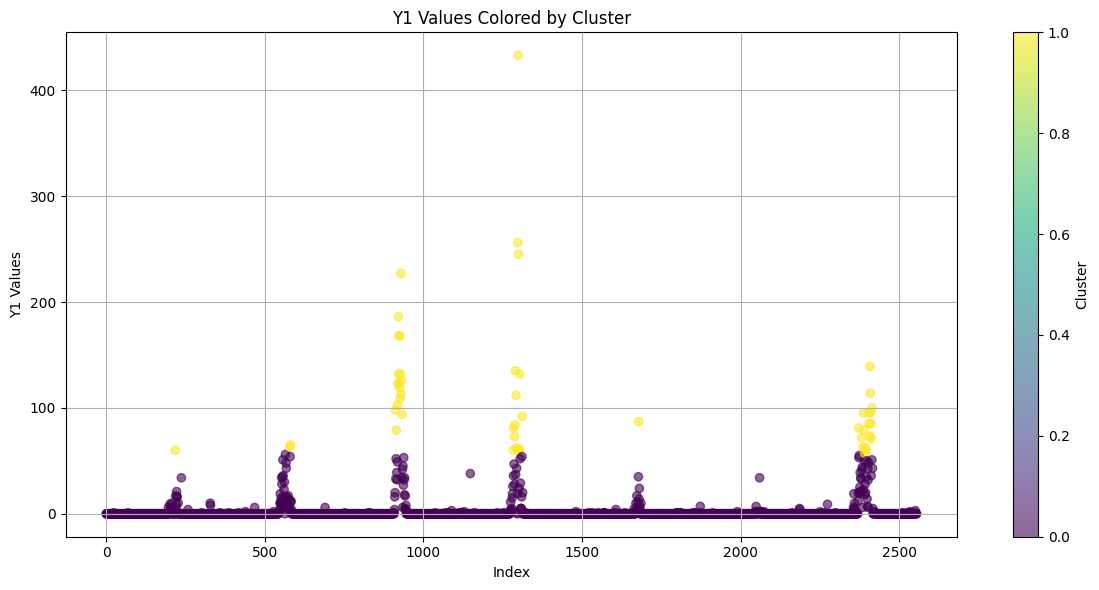

In [ ]:

plt.figure(figsize=(12, 6))


scatter = plt.scatter(df.index, df['Y1'], c=df['cluster'], cmap='viridis', alpha=0.6)


plt.colorbar(scatter, label='Cluster')

plt.xlabel("Index")
plt.ylabel("Y1 Values")
plt.title("Y1 Values Colored by Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

Q1 = pd.DataFrame(df_target['Y1'].unique()).quantile(0.25)
Q1

,0.25
0,23.0


In [ ]:

Q1 = pd.DataFrame(df_target['Y1'].unique()).quantile(0.75)
Q1

,0.75
0,92.0


In [ ]:

m =pd.DataFrame(df_target['Y1'].unique()).median()
m

,0
0,49.0


In [ ]:
df_target['Cluster'] = clusters
df_target[df_target['Cluster']==2].describe()

,Y1,Cluster
count,96.000000,96.0
mean,79.041667,2.0
std,58.995792,0.0
min,32.000000,2.0
25%,43.000000,2.0
50%,60.000000,2.0
75%,95.250000,2.0
max,433.000000,2.0


In [ ]:

X[X['cluster']==1].describe()

,Y1,cluster
count,51.000000,51.0
mean,111.529412,1.0
std,65.285329,0.0
min,57.000000,1.0
25%,72.500000,1.0
50%,95.000000,1.0
75%,124.500000,1.0
max,433.000000,1.0


In [ ]:

X[X['cluster']==0].describe()

,Y1,cluster
count,2505.000000,2505.0
mean,1.326547,0.0
std,6.320983,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,0.000000,0.0
max,56.000000,0.0


In [ ]:
df[df['cluster']==1].drop(['time'],axis=1).describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,cluster
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0
mean,1.693401,-0.453768,-0.343040,0.930121,61.240500,159.389722,91.655473,10.887956,40.826993,42.836516,40.331731,1.0
std,1.378537,5.091045,3.773575,1.686846,28.601811,60.686126,38.420011,3.959413,21.608450,14.814354,53.738412,0.0
min,-0.365316,-9.301796,-10.523009,-1.690511,0.000000,81.275160,37.850705,5.100141,8.987975,17.134656,0.000000,1.0
25%,0.764591,-4.832460,-3.000133,-0.069481,70.000000,113.670558,63.683823,7.859698,25.187300,31.418656,5.000000,1.0
50%,1.280797,-0.648567,-0.588829,1.082359,70.000000,143.086389,80.972708,10.050816,34.026156,41.167289,21.000000,1.0
75%,2.270107,3.548098,2.349987,2.028055,74.950749,189.872678,111.139101,13.151108,49.916904,50.680136,54.250000,1.0
max,7.107873,13.051544,9.028420,4.487969,88.653333,479.722174,281.673389,23.241791,115.876574,88.054318,433.000000,1.0


In [ ]:
df.drop(['time'],axis=1).describe()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,cluster
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,-10.190040,0.139648,0.626351,-0.858922,73.267808,18.789275,11.522362,1.328740,4.382248,5.191286,3.525430,0.081377
std,10.340583,5.013640,3.955417,1.446165,29.250724,47.703600,27.942124,3.393452,12.971518,13.406972,18.977537,0.273467
min,-32.019122,-13.846656,-12.316128,-1.692462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.877500,-3.610168,-2.079422,-1.689860,70.000000,0.123798,0.121437,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.596479,-0.187084,0.912780,-1.689860,84.601769,0.481870,0.481870,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.167824,3.807440,3.483397,-0.297573,90.362319,4.080174,3.961181,0.004413,0.010148,0.000150,0.000000,0.000000
max,7.840619,14.640913,12.811255,6.054536,99.500682,479.722174,281.673389,23.241791,115.876574,88.054318,433.000000,1.000000


In [ ]:
cluster_counts = df['cluster'].value_counts()
cluster_counts
# plt.figure(figsize=(10, 6))
# plt.bar(cluster_counts.index, cluster_counts.values)
# plt.xlabel("Cluster")
# plt.ylabel("Count")
# plt.title("Cluster Counts")
# plt.grid(True)
# plt.show()

,count
cluster,
0,2505
1,51


In [ ]:
df

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,cluster,Infrason_type
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0,0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0,0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0,0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0,0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,3,0,0
2552,2019-12-28,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0,0,0
2553,2019-12-29,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0,0,0
2554,2019-12-30,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0,0,0


## Feature engineering

In [ ]:
df["day"]=df["time"].dt.day
df["month"]=df["time"].dt.month
df["year"]=df["time"].dt.year

In [ ]:
df.select_dtypes(include="number").corrwith(df_target.Y1)

,0
t2m,0.206876
u10,-0.007575
v10,-0.061570
SST,0.218057
SIC,-0.119269
r1_MAR,0.599213
r2_MAR,0.591531
r3_MAR,0.511553
r4_MAR,0.518987
r5_MAR,0.501149


In [ ]:
df['is_variation_season'] = df['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)

In [ ]:
df

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,cluster,Infrason_type,day,month,year,is_variation_season
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0,0,0,1,1,2013,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0,0,0,2,1,2013,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0,0,0,3,1,2013,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0,0,0,4,1,2013,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0,0,0,5,1,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,3,0,0,27,12,2019,0
2552,2019-12-28,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0,0,0,28,12,2019,0
2553,2019-12-29,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0,0,0,29,12,2019,0
2554,2019-12-30,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0,0,0,30,12,2019,0


## Désiquilibre des données

In [ ]:
df

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,day,month,year,is_variation_season,Y1_binaire
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0,1,1,2013,0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0,2,1,2013,0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0,3,1,2013,0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0,4,1,2013,0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0,5,1,2013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,3,27,12,2019,0,0
2552,2019-12-28,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0,28,12,2019,0,0
2553,2019-12-29,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0,29,12,2019,0,0
2554,2019-12-30,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0,30,12,2019,0,0


In [ ]:
df["Y1_binaire"]=df['Y1'].apply(lambda x:0 if x<60 else 1)

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd


X = df.drop(["Y1_binaire", "time", "day", "month", "year"], axis=1)
y = df['Y1_binaire']

min_samples_per_class = y.value_counts()
min_samples = min_samples_per_class.min()

k_neighbors_value = min(5, min_samples - 1)

smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)
try:

    X_resampled, y_resampled = smote.fit_resample(X, y)

    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled['Y1_binaire'] = y_resampled

    print("Distribution des classes après SMOTE :")
    print(df_resampled['Y1_binaire'].value_counts())

except ValueError as e:
    print("Erreur :", e)
    print("Ajustez davantage k_neighbors pour qu'il soit inférieur à la taille de la plus petite classe.")


Distribution des classes après SMOTE :
Y1_binaire
0    2506
1    2506
Name: count, dtype: int64


In [ ]:
df_resampled

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,is_variation_season,Y1_binaire
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.000000,0.000000,0.000000,0,0,0
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.000000,0.000000,0.000000,0,0,0
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.000000,0.000000,0.000000,0,0,0
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.000000,0.000000,0.000000,0,0,0
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,3.724256,2.335267,2.193904,0.298697,0.000000,155.118232,94.299169,9.893726,27.759675,36.812073,108,1,1
5008,1.616397,2.034437,-1.578638,0.983862,70.000000,181.619835,100.699970,9.693863,45.594717,37.806824,82,1,1
5009,1.495773,-6.304377,0.526973,2.963503,70.000000,182.128196,105.526133,9.742499,39.574758,42.091950,111,1,1
5010,1.087292,-3.790449,-1.090695,0.942485,74.097094,118.984039,65.800479,6.658434,28.761689,25.006554,81,1,1


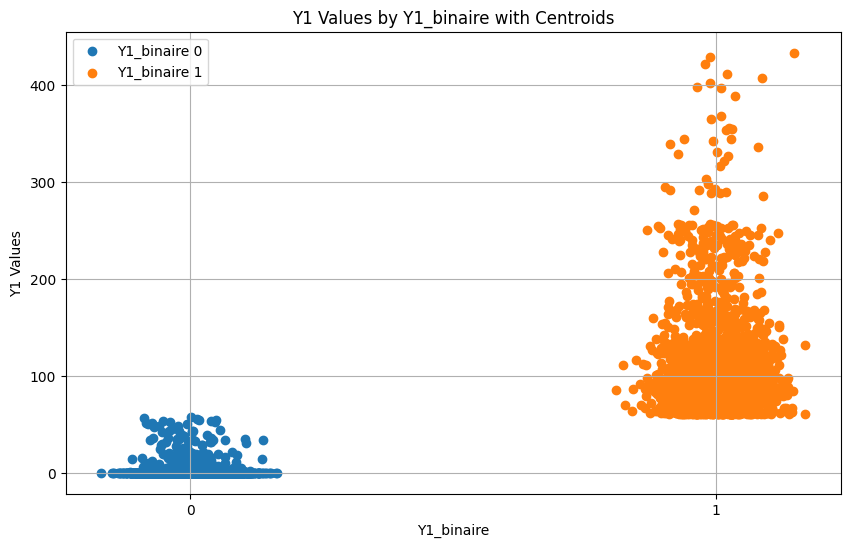

In [ ]:
plt.figure(figsize=(10, 6))


for cluster in df_resampled['Y1_binaire'].unique():
    plt.scatter(np.random.normal(cluster, 0.05, size=len(df_resampled[df_resampled['Y1_binaire'] == cluster])),
                df_resampled[df_resampled['Y1_binaire'] == cluster]['Y1'],
                label=f'Y1_binaire {cluster}')

# Get centroids
# centroids = kmeans.cluster_centers_

# Plot centroids
# for i, centroid in enumerate(centroids):
#     plt.scatter(i, centroid, marker='X', s=200, color='red', label=f'Centroid {i+1}' if i == 0 else "")
#     # Label only the first centroid to avoid repetition

plt.xlabel("Y1_binaire")
plt.ylabel("Y1 Values")
plt.title("Y1 Values by Y1_binaire with Centroids")
plt.xticks(df_resampled['Y1_binaire'].unique())
plt.legend()
plt.grid(True)
plt.show()

## Modélisation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y1,day,month,year,is_variation_season,Y1_binaire
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0,1,1,2013,0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0,2,1,2013,0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0,3,1,2013,0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0,4,1,2013,0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0,5,1,2013,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0,3,27,12,2019,0,0
2552,2019-12-28,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0,0,28,12,2019,0,0
2553,2019-12-29,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0,0,29,12,2019,0,0
2554,2019-12-30,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0,0,30,12,2019,0,0


In [ ]:
df["Y1_binaire"]=df['Y1'].apply(lambda x:0 if x<20 else 1)
X=df.drop(["Y1","Y1_binaire","time"],axis=1)
y=df["Y1_binaire"]

Decision Tree - Mesures de Performance :
  - Accuracy : 0.96
  - F1 Score : 0.53
  - Recall (Sensibilité) : 0.47
  - Precision : 0.61

--------------------------------------------------

Random Forest - Mesures de Performance :
  - Accuracy : 0.97
  - F1 Score : 0.63
  - Recall (Sensibilité) : 0.63
  - Precision : 0.64

--------------------------------------------------

AdaBoost Classifier - Mesures de Performance :
  - Accuracy : 0.96
  - F1 Score : 0.64
  - Recall (Sensibilité) : 0.69
  - Precision : 0.59

--------------------------------------------------

Neural Network - Mesures de Performance :
  - Accuracy : 0.97
  - F1 Score : 0.61
  - Recall (Sensibilité) : 0.57
  - Precision : 0.66

--------------------------------------------------

SVM - Mesures de Performance :
  - Accuracy : 0.97
  - F1 Score : 0.61
  - Recall (Sensibilité) : 0.58
  - Precision : 0.65

--------------------------------------------------

Naive Bayes - Mesures de Performance :
  - Accuracy : 0.93
  - F1 Sc

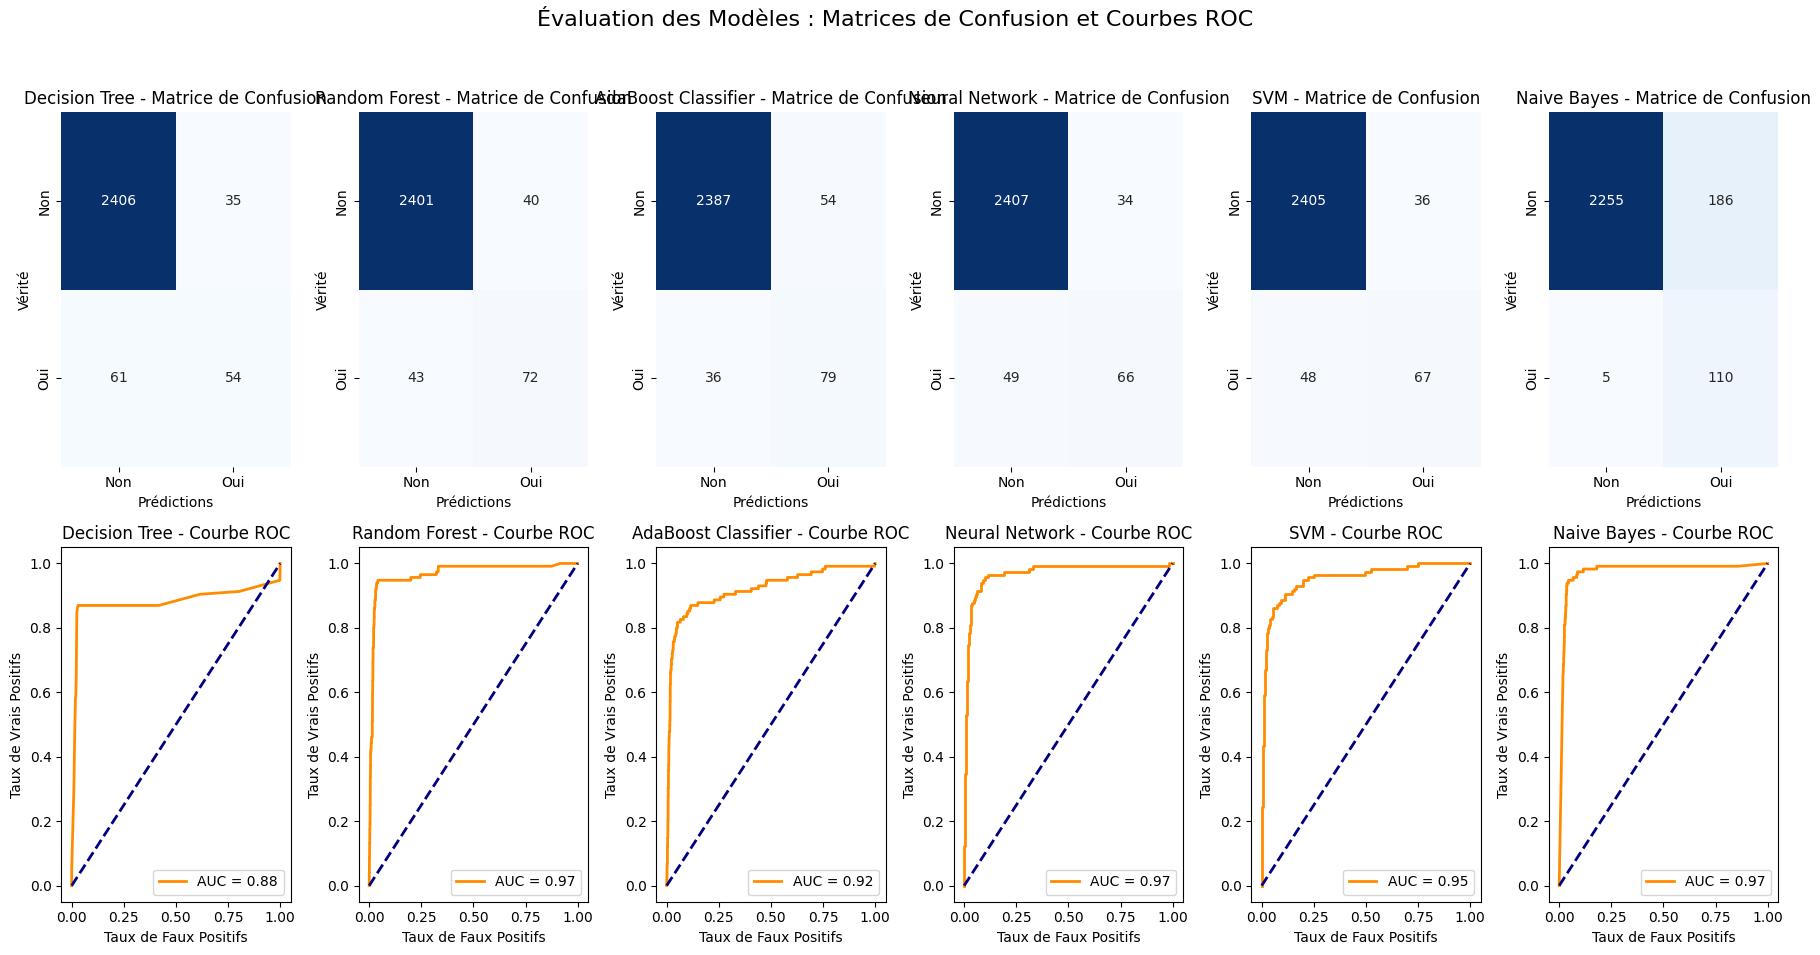

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, f1_score, recall_score, precision_score


models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=2, random_state=0),
    "Random Forest": RandomForestClassifier(max_depth=2, random_state=0),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=150, learning_rate=1.5, algorithm='SAMME'),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0),
    "SVM": SVC(probability=True, kernel='linear', random_state=0),
    "Naive Bayes": GaussianNB(),
}


skf = StratifiedKFold(n_splits=5)
fig, axes = plt.subplots(nrows=2, ncols=len(models), figsize=(18, 10))
fig.suptitle("Évaluation des Modèles : Matrices de Confusion et Courbes ROC", fontsize=16)


for i, (model_name, model) in enumerate(models.items()):

    y_pred = cross_val_predict(model, X, y, cv=skf)
    y_proba = cross_val_predict(model, X, y, cv=skf, method="predict_proba")[:, 1] if hasattr(model, "predict_proba") else None

    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"], ax=axes[0, i])
    axes[0, i].set_title(f"{model_name} - Matrice de Confusion")
    axes[0, i].set_xlabel("Prédictions")
    axes[0, i].set_ylabel("Vérité")


    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)


    print(f"{model_name} - Mesures de Performance :")
    print(f"  - Accuracy : {accuracy:.2f}")
    print(f"  - F1 Score : {f1:.2f}")
    print(f"  - Recall (Sensibilité) : {recall:.2f}")
    print(f"  - Precision : {precision:.2f}")
    print("\n" + "-"*50 + "\n")


    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y, y_proba)
        roc_auc = auc(fpr, tpr)
        axes[1, i].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
        axes[1, i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[1, i].set_title(f"{model_name} - Courbe ROC")
        axes[1, i].set_xlabel('Taux de Faux Positifs')
        axes[1, i].set_ylabel('Taux de Vrais Positifs')
        axes[1, i].legend(loc="lower right")
    else:
        axes[1, i].text(0.5, 0.5, 'Probabilités non disponibles', ha='center', va='center', fontsize=12)
        axes[1, i].set_title(f"{model_name} - ROC non disponible")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Sauvgarde de meilleur modéle et création de l'interface   

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install gradio -q
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X, y)

In [ ]:
import joblib
import gradio as gr

joblib.dump(rf_model, 'random_forest_model.joblib')
print("Modèle Random Forest sauvegardé avec succès!")

loaded_model = joblib.load('random_forest_model.joblib')


def preprocess_data(data):

    data['time'] = pd.to_datetime(data['time'])
    data['day'] = data['time'].dt.day
    data['month'] = data['time'].dt.month
    data['year'] = data['time'].dt.year


    data['is_variation_season'] = data['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)

    data = data.drop(columns=['time'])
    return data


def predict_class(time, t2m, u10, v10, SST, SIC, r1_MAR, r2_MAR, r3_MAR, r4_MAR, r5_MAR):

    input_data = pd.DataFrame({
        'time': [time],
        't2m': [t2m],
        'u10': [u10],
        'v10': [v10],
        'SST': [SST],
        'SIC': [SIC],
        'r1_MAR': [r1_MAR],
        'r2_MAR': [r2_MAR],
        'r3_MAR': [r3_MAR],
        'r4_MAR': [r4_MAR],
        'r5_MAR': [r5_MAR]
    })

    processed_data = preprocess_data(input_data)

    prediction = loaded_model.predict(processed_data)
    return "Activité infrasonore : élevée" if prediction[0] == 1 else "Activité infrasonore : Faible"

inputs = [
    gr.Textbox(label="Time (YYYY-MM-DD)"),
    gr.Number(label="t2m"),
    gr.Number(label="u10"),
    gr.Number(label="v10"),
    gr.Number(label="SST"),
    gr.Number(label="SIC"),
    gr.Number(label="r1_MAR"),
    gr.Number(label="r2_MAR"),
    gr.Number(label="r3_MAR"),
    gr.Number(label="r4_MAR"),
    gr.Number(label="r5_MAR")
]

interface = gr.Interface(fn=predict_class, inputs=inputs, outputs="text", title="Prédiction de Classe")


interface.launch()


Modèle Random Forest sauvegardé avec succès!
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fae61319fde6875cd7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
